In [1]:
import pandas as pd 
import numpy as np 
import os 
import seaborn as sb
from matplotlib import pyplot as plt

In [2]:
agent_sets = [""]

#### This notebook is used to analyze sugarscape price equillibrium with different agent types

In [3]:
for file in os.listdir("parquet"): 
    if os.listdir("parquet/" + file) == []: 
        print(file)
    

#### Replicate these variables from the GUI.py file. Could be called from this notebook but there would be too many print statements. Choose which variables to save in cols. 

In [4]:
model_attributes = ["population", "total_exchanges", "total_agents_created", "total_avg_price", "runtime",
                     "water_avg_price", "sugar_avg_price",# "total_variance", "water_variance", "sugar_variance",
                       "tech_eff_capital", "wealth_per_capita", "savings",
                      "num_basicherders", "num_arbitrageurherders", "num_basicbasics", "num_arbitrageurbasics", 
                        "basicbasic_res_demand", "basicherder_res_demand", "arbitrageurbasic_res_demand", "arbitrageurherder_res_demand", "optimizer_MRS", "num_optimizers"]

runs = 30
cols = ["population", "tech_eff_capital", "total_avg_price", "runtime", "wealth_per_capita", "water_avg_price", "sugar_avg_price"]

#### This code gets all of the run data for the selected cols

In [5]:
breed = [
 "basic",
 'basic-arbitrageur',
 'basic-optimizer-arbitrageur',
 'optimizer',
 #'optimizer-arbitrageur'
]
data_by_breeds = {}
for primary_breed_set in breed:
    data_by_breeds[primary_breed_set] = {}
    for attr in cols: 
        data_by_breeds[primary_breed_set][attr] = pd.DataFrame()
        for run in range(runs): 
            data_by_breeds[primary_breed_set][attr][run] = pd.read_parquet("parquet/" + primary_breed_set + "/" + attr + "/" + str(run) + ".parquet")[attr][:5000]

In [6]:
data_by_breeds

{'basic': {'population':         0     1     2     3     4     5     6     7     8     9   ...    20  \
  0     2000  2000  2000  2000  2000  2000  2000  2000  2000  2000  ...  2000   
  1     2000  2000  2000  2000  2000  2000  2000  2000  2000  2000  ...  2000   
  2     2000  2000  2000  2000  2000  2000  2000  2000  2000  2000  ...  2000   
  3     2000  2000  2000  2000  2000  2000  2000  2000  2000  2000  ...  2000   
  4     2000  2000  2000  2000  2000  2000  2000  2000  2000  2000  ...  2000   
  ...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
  4995   472   570   499   529   511   457   467   476   433   455  ...   473   
  4996   477   574   499   527   512   458   467   477   429   459  ...   476   
  4997   477   575   500   527   517   456   466   473   425   458  ...   474   
  4998   476   574   500   525   518   452   466   470   423   456  ...   474   
  4999   474   576   499   523   518   449   465   469   423   457  ...   473   
  
  

#### This code pulls the final price - the equillibrium - from each run 

In [7]:
price_data = {}
for breed_set in breed: 
    price_data[breed_set] = []
    for run in range(runs): 
        price_data[breed_set].append(data_by_breeds[breed_set]["total_avg_price"][run][len(data_by_breeds[breed_set]["total_avg_price"][run]) - 1])

In [8]:
price_data = pd.DataFrame.from_dict(price_data)

#### This code gets the standard deviation of the price equillibriums by breed set

In [9]:
for breeds in price_data.keys(): 
    print(breeds + ": " + str(np.std(price_data[breeds])))

basic: 0.007777498801578078
basic-arbitrageur: 0.007282127398102471
basic-optimizer-arbitrageur: 0.008383127110123683
optimizer: 0.0028231711519518094


Text(0.5, 1.0, 'Figure 3: Distribution of Price Equillibria Across 30 Runs')

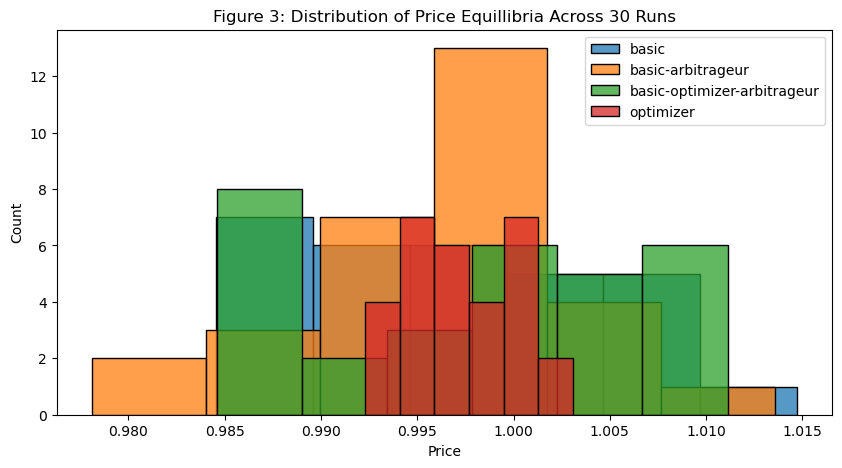

In [22]:
fig, ax = plt.subplots(figsize = (10, 5))
for i, breeds in enumerate(price_data.keys()): 
    sb.histplot(price_data[breeds], bins=6, color="C" + str(i), label=breeds, kde=False, ax=ax)
    
ax.legend()
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Figure 3: Distribution of Price Equillibria Across 30 Runs")


With current implementation, the spread in price equillibriums is significantly smaller with just optimizer agents.

In [14]:
data_by_breeds.keys()

dict_keys(['basic', 'basic-arbitrageur', 'basic-optimizer-arbitrageur', 'optimizer'])

In [15]:
for breeds in data_by_breeds.keys(): 
    print(data_by_breeds[breeds]["wealth_per_capita"])

              0           1           2           3           4           5   \
0      73.756513   73.754144   74.032753   73.373310   74.205676   73.932202   
1      74.642704   74.668905   74.863656   74.263267   75.084936   74.822904   
2      75.053729   75.075344   75.260217   74.662761   75.495535   75.236847   
3      75.460386   75.491678   75.646353   75.074852   75.911160   75.651690   
4      75.859592   75.904122   76.038728   75.477917   76.319683   76.061173   
...          ...         ...         ...         ...         ...         ...   
4995  499.126533  731.279498  544.472680  616.241535  597.106284  471.616595   
4996  494.594369  728.303876  543.563942  620.767463  596.236153  473.835446   
4997  497.429952  728.418494  544.700174  621.022357  592.666463  478.822457   
4998  498.989528  730.865001  540.734944  617.106366  592.258505  482.162198   
4999  500.032513  731.625087  542.976285  620.714034  592.810109  486.331660   

              6           7           8

basic
basic-arbitrageur
basic-optimizer-arbitrageur
optimizer


Text(0.5, 1.0, 'Figure 4: Average Wealth Per Capita by Period Across 30 Runs')

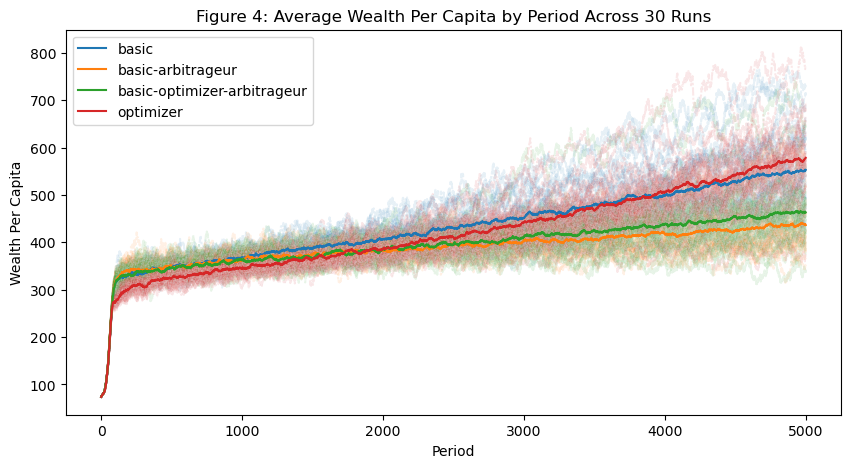

In [43]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, breed in enumerate(data_by_breeds.keys()): 
    print(breed)
    sb.lineplot(data=data_by_breeds[breed]["wealth_per_capita"], alpha = 0.1, color='C'+str(i),palette =['C'+str(i)]*30, ls = "", marker = ".", markersize=0.5,legend=False, ax=ax)
for i, breed in enumerate(data_by_breeds.keys()):
    sb.lineplot(data=data_by_breeds[breed]["wealth_per_capita"].mean(axis=1), alpha = 1, color='C'+str(i), label = breed, ax=ax)
plt.xlabel("Period")
plt.ylabel("Wealth Per Capita")
plt.title("Figure 4: Average Wealth Per Capita by Period Across 30 Runs")

Text(0.5, 1.0, 'Figure 2: Average Trading Price for All Goods, by Period, 30 Runs')

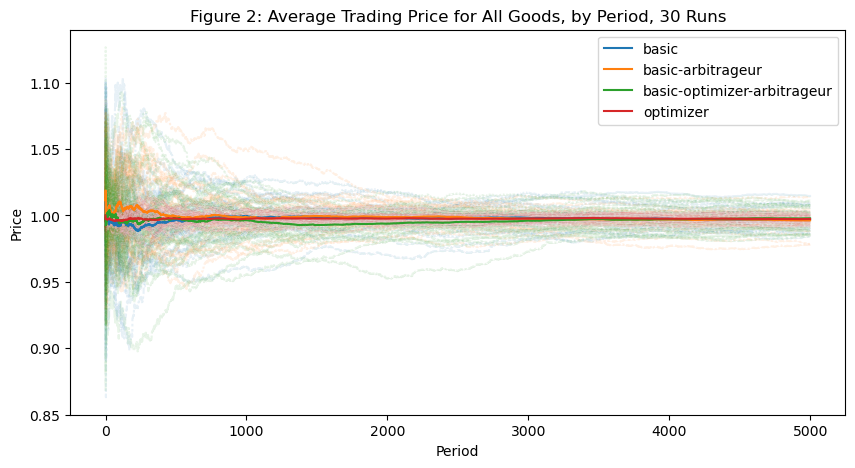

In [50]:
fig, ax = plt.subplots(figsize=(10, 5))

for i, breed in enumerate(data_by_breeds.keys()): 
    sb.lineplot(data=data_by_breeds[breed]["total_avg_price"], alpha = 0.1, color="C"+str(i), palette=["C"+str(i)]*30, ls = "", marker = ".", legend = False, markersize=.5, ax=ax)
for i, breed in enumerate(data_by_breeds.keys()): 
    sb.lineplot(data=data_by_breeds[breed]["total_avg_price"].mean(axis=1), alpha = 1, color="C"+str(i), label=breed, ax=ax)
    #sb.lineplot(data=data_by_breeds[breed]["water_avg_price"], alpha = 0.3, color="C"+str(i), legend = False, ax=ax)
    #sb.lineplot(data=data_by_breeds[breed]["water_avg_price"].mean(axis=1), alpha = 1, color="C"+str(i), label=None, ax=ax)
    #sb.lineplot(data=data_by_breeds[breed]["sugar_avg_price"], alpha = 0.3, color="C"+str(i), legend = False, ax=ax)
    #sb.lineplot(data=data_by_breeds[breed]["sugar_avg_price"].mean(axis=1), alpha = 1, color="C"+str(i), label=None, ax=ax)
plt.xlabel("Period")
plt.ylabel("Price")
plt.title("Figure 2: Average Trading Price for All Goods, by Period, 30 Runs")

Text(0.5, 1.0, 'Figure 1: Runtime per Agent, by Period, 30 Runs')

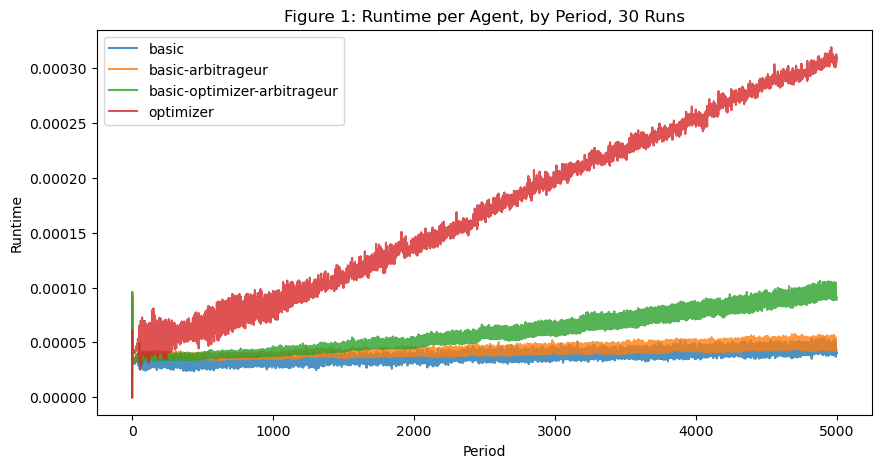

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))

for i, breed in enumerate(data_by_breeds.keys()): 
   # sb.lineplot(data=(data_by_breeds[breed]["runtime"] / data_by_breeds[breed]["population"]), alpha = 0.1, color="C"+str(i), palette=["C"+str(i)]*30, legend = False, ax=ax)
    sb.lineplot(data=(data_by_breeds[breed]["runtime"] / data_by_breeds[breed]["population"]).mean(axis=1),  alpha = 0.8, color="C"+str(i), label=breed, ax=ax)
    #sb.lineplot(data=data_by_breeds[breed]["water_avg_price"], alpha = 0.3, color="C"+str(i), legend = False, ax=ax)
    #sb.lineplot(data=data_by_breeds[breed]["water_avg_price"].mean(axis=1), alpha = 1, color="C"+str(i), label=None, ax=ax)
    #sb.lineplot(data=data_by_breeds[breed]["sugar_avg_price"], alpha = 0.3, color="C"+str(i), legend = False, ax=ax)
    #sb.lineplot(data=data_by_breeds[breed]["sugar_avg_price"].mean(axis=1), alpha = 1, color="C"+str(i), label=None, ax=ax)
plt.xlabel("Period")
plt.ylabel("Runtime")
plt.title("Figure 1: Runtime per Agent, by Period, 30 Runs")